<a href="https://colab.research.google.com/github/keshavnirwan/Machine-Learning-Algorithms/blob/main/Face%20Mask%20Detection%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 154M/163M [00:01<00:00, 102MB/s] 
100% 163M/163M [00:02<00:00, 84.1MB/s]


In [6]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

 data   face-mask-dataset.zip  'kaggle (1).json'   kaggle.json	 sample_data


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3066.jpg', 'with_mask_3688.jpg', 'with_mask_1331.jpg', 'with_mask_1871.jpg', 'with_mask_3301.jpg']
['with_mask_3676.jpg', 'with_mask_2215.jpg', 'with_mask_1105.jpg', 'with_mask_1924.jpg', 'with_mask_3074.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_297.jpg', 'without_mask_1134.jpg', 'without_mask_442.jpg', 'without_mask_1792.jpg', 'without_mask_2129.jpg']
['without_mask_896.jpg', 'without_mask_2848.jpg', 'without_mask_991.jpg', 'without_mask_206.jpg', 'without_mask_2176.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828



with mask --> 1

without mask --> 0

In [12]:

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))


3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

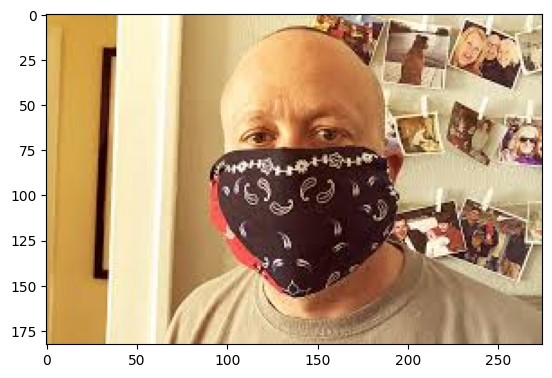

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_3688.jpg')
imgplot = plt.imshow(img)
plt.show()

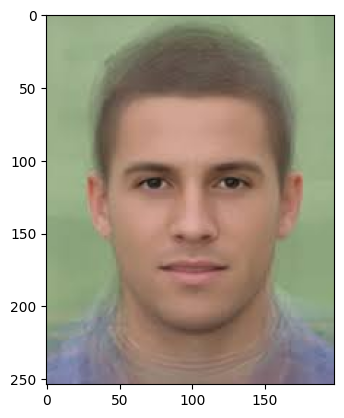

In [19]:
img = mpimg.imread('/content/data/without_mask/without_mask_1134.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

Resize the Images

Convert the images to numpy arrays

In [20]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

array([[[221, 215, 217],
        [221, 215, 217],
        [221, 215, 217],
        ...,
        [225, 219, 221],
        [225, 219, 221],
        [225, 219, 221]],

       [[221, 215, 217],
        [221, 215, 217],
        [221, 215, 217],
        ...,
        [225, 219, 221],
        [225, 219, 221],
        [225, 219, 221]],

       [[221, 215, 217],
        [221, 215, 217],
        [221, 215, 217],
        ...,
        [225, 219, 221],
        [225, 219, 221],
        [225, 219, 221]],

       ...,

       [[  6,   4,   7],
        [  6,   4,   7],
        [  6,   4,   7],
        ...,
        [  4,   2,   5],
        [  4,   2,   5],
        [  4,   2,   5]],

       [[  6,   4,   7],
        [  6,   4,   7],
        [  6,   4,   7],
        ...,
        [  4,   3,   5],
        [  4,   3,   5],
        [  4,   3,   5]],

       [[  6,   4,   7],
        [  6,   4,   7],
        [  6,   4,   7],
        ...,
        [  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6]]], dtype=uint8)
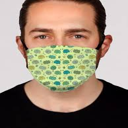

In [23]:
data[0]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
X = np.array(data)
Y = np.array(labels)

In [27]:
  type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 31,  63, 102],
        [ 31,  63, 102],
        [ 31,  63, 102],
        ...,
        [ 34,  56,  97],
        [ 34,  56,  97],
        [ 33,  55,  96]],

       [[ 33,  65, 104],
        [ 31,  63, 102],
        [ 28,  60, 100],
        ...,
        [ 36,  58,  99],
        [ 35,  58,  99],
        [ 35,  57,  98]],

       [[ 35,  67, 106],
        [ 32,  64, 102],
        [ 29,  61, 101],
        ...,
        [ 31,  52,  94],
        [ 32,  53,  94],
        [ 32,  54,  95]],

       ...,

       [[134, 115, 133],
        [134, 119, 134],
        [130, 121, 134],
        ...,
        [  9,  15,  39],
        [  7,  13,  37],
        [  4,  11,  37]],

       [[134, 116, 135],
        [128, 115, 133],
        [125, 120, 135],
        ...,
        [  7,  13,  35],
        [  6,  12,  36],
        [  5,  11,  35]],

       [[138, 119, 141],
        [125, 112, 133],
        [ 85,  81,  99],
        ...,
        [  5,  11,  32],
        [  3,  12,  35],
        [  3,  12,  35]]], dtype=uint8)
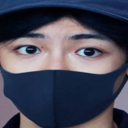

In [33]:
X_train[0]

In [34]:
X_train_scaled[0]

array([[[0.12156863, 0.24705882, 0.4       ],
        [0.12156863, 0.24705882, 0.4       ],
        [0.12156863, 0.24705882, 0.4       ],
        ...,
        [0.13333333, 0.21960784, 0.38039216],
        [0.13333333, 0.21960784, 0.38039216],
        [0.12941176, 0.21568627, 0.37647059]],

       [[0.12941176, 0.25490196, 0.40784314],
        [0.12156863, 0.24705882, 0.4       ],
        [0.10980392, 0.23529412, 0.39215686],
        ...,
        [0.14117647, 0.22745098, 0.38823529],
        [0.1372549 , 0.22745098, 0.38823529],
        [0.1372549 , 0.22352941, 0.38431373]],

       [[0.1372549 , 0.2627451 , 0.41568627],
        [0.1254902 , 0.25098039, 0.4       ],
        [0.11372549, 0.23921569, 0.39607843],
        ...,
        [0.12156863, 0.20392157, 0.36862745],
        [0.1254902 , 0.20784314, 0.36862745],
        [0.1254902 , 0.21176471, 0.37254902]],

       ...,

       [[0.5254902 , 0.45098039, 0.52156863],
        [0.5254902 , 0.46666667, 0.5254902 ],
        [0.50980392, 0

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 144s 826ms/step - acc: 0.6917 - loss: 0.6262 - val_acc: 0.8744 - val_loss: 0.3200
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 820ms/step - acc: 0.8785 - loss: 0.3115 - val_acc: 0.8959 - val_loss: 0.2403
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 138s 798ms/step - acc: 0.8967 - loss: 0.2525 - val_acc: 0.9174 - val_loss: 0.2048
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 144s 812ms/step - acc: 0.9113 - loss: 0.2182 - val_acc: 0.9174 - val_loss: 0.1784
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 800ms/step - acc: 0.9372 - loss: 0.1642 - val_acc: 0.8975 - val_loss: 0.2178


In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - acc: 0.9298 - loss: 0.1887
Test Accuracy = 0.9152879118919373


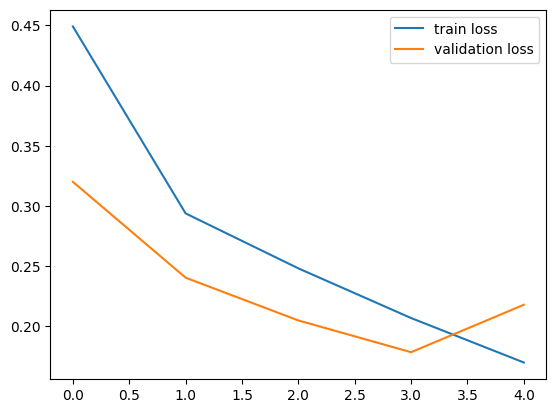

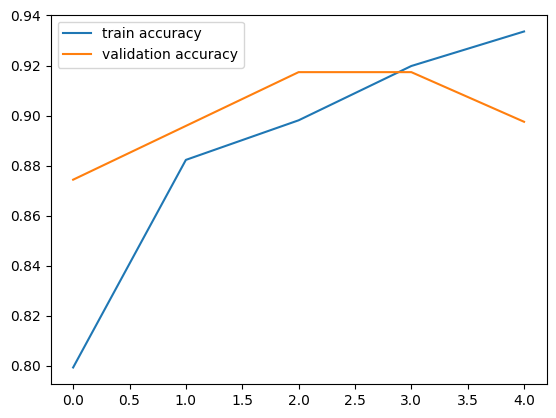

In [40]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/Screenshot 2024-08-03 103149.png


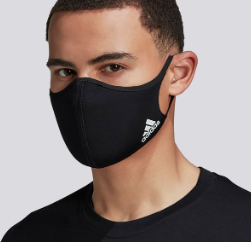

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.16028322 0.7417765 ]]
1
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')